- `reviews.csv` : 영어 리뷰
- `reviews_by_course.csv` : 다국어 리뷰   
따라서 `reviews.csv` 를 쓰도록 한다.

In [246]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('./reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [247]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
100467,Trendy topic with talks from expertises in the...,4
100468,"Wonderful! Simple and clear language, good ins...",5
100469,an interesting and fun course. thanks. dr quincy,5
100470,"very broad perspective, up to date information...",4


<AxesSubplot:>

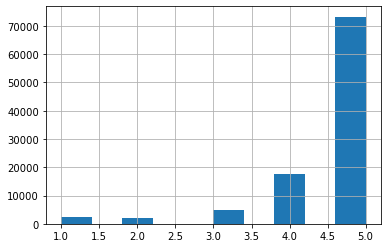

In [248]:
dataset['Label'].hist()

In [249]:
dataset['Label'].value_counts()

5    73276
4    17558
3     5016
1     2403
2     2219
Name: Label, dtype: int64

In [250]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [251]:
dataset['Label'].value_counts()

5    73276
4    17558
1     2403
2     2219
Name: Label, dtype: int64

In [252]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4    2508
1    2403
2    2219
5    2093
Name: Label, dtype: int64

In [253]:
dataset.shape

(9223, 2)

In [254]:
# train과 test를 나눠주기 위한 준비
X = dataset['Review']
y = dataset['Label']

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)


In [256]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 4    1220
1    1211
2    1102
5    1078
Name: Label, dtype: int64
----------------------------
test set: 4    1288
1    1192
2    1117
5    1015
Name: Label, dtype: int64


In [257]:
dataset.dtypes

Review    object
Label      int64
dtype: object

In [258]:
# dataset['Label']=dataset['Label'].map(lambda x: {1:0,2:0,4:1,5:1})
# d={1:0,2:0,4:1,5:1}
# dataset['Label']=dataset['Label'].map(lambda x: d[x])

In [259]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [279]:
dataset['Label'].value_counts()

0    4622
1    4601
Name: Label, dtype: int64

In [280]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896    Best course (after CS50), that I took in Inter...
6753                        Too much of a difficulty jump
7326                       This is one of the best course
                              ...                        
2740    The value of this course is the collection of ...
9055    The course really helps me review important th...
8206    Love the case study based approach where we so...
8391    Well structured programming assignments provid...
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [ ]:
#      >>train set

In [282]:
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=20)

In [283]:
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

ValueError: could not convert string to float: 'The Lecturers are very enthusiastic, but I was hoping for examples and assignments based on Pandas and Skikit-Learn. Instead the course examples and assignments are based on a machine learning package called Graphlab, that stopped working when it was upgraded to version 2 (there are workarounds that enable it to work locally, but clearly it isn\'t "enterprise ready")'

In [263]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 0    2313
1    2298
Name: Label, dtype: int64
----------------------------
test set: 0    2309
1    2303
Name: Label, dtype: int64


In [261]:
# train과 test를 나눠주기 위한 준비
X = dataset['Review']
y = dataset['Label']

In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:',X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

print('y_test shape:', y_test.dtype)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)
y_test shape: int64


In [264]:
dataset.shape

(9223, 2)

In [185]:
#  y_test 컬럼만 삭제 하기 >> test set

### Cousera Review에 적용하기

1. train set과 test set 만들기  
raw 데이터를 우선 섞어서,  train과 test로 반으로 나눠준 다음, train에만 `sentiment` 컬럼을 추가로 붙여준다. 

In [ ]:
# 위에서 정제해준 리뷰의 첫 번째 데이터를 확인
# Check: clean_test_reviews 는 Series type
clean_test_reviews[0]

In [ ]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
reveiw_sample1 = "I wasted my time to watch this movie. I don't understand "
sample1 = pd.Series(reveiw_sample1)

In [ ]:
# 테스트 데이터를 벡터화 함
%time test_data_features = pipeline.transform(sample1)
# %time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

In [ ]:
# 테스트 데이터를 넣고 예측한다.
result = forest.predict(test_data_features)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 

In [ ]:
print("결과:",result[:100])